In [4]:
import os
import pickle 
import numpy as np
#from elasticsearch import Elasticsearch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import urllib
import pycurl
from io import BytesIO
sns.set()

%matplotlib inline

In [20]:
tpc_str = 'refugee'
cum_doc_cnt = '41500'

s = pickle.load(open(os.path.join('./data', 'concept_stats.'+tpc_str+'.'+str(cum_doc_cnt)+'.pkl'), 'rb'))
#{'df_concept':df_concept}
df_concept = s['df_concept']

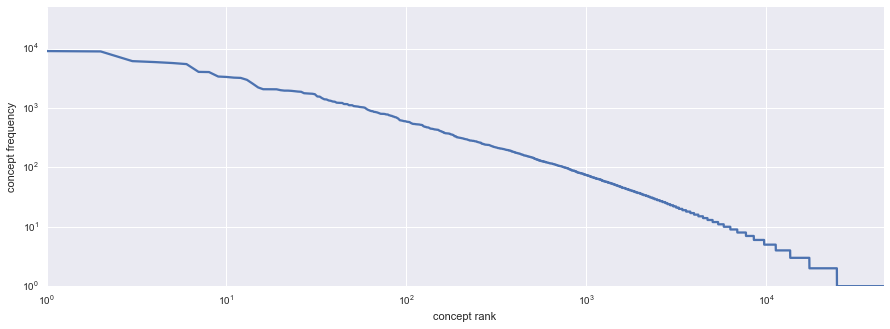

In [21]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 1, 1)
sns.set_context("talk", font_scale=1.)
sns.set_style("whitegrid")

ax1.autoscale(enable=True, tight=True)
ax1.loglog([i for i in range(len(df_concept))], df_concept['count'])
ax1.set_xlabel('concept rank')
ax1.set_ylabel('concept frequency')

In [ ]:
istart = 200
iend = 225
place_ent = []
other_ent = []
for idx in range(istart, iend):
    if df_concept.iloc[idx]['DBpedia:Place']:
        place_ent.append( df_concept.index[idx] )
        ax1.plot(idx, df_concept.iloc[idx]['count'], 'x', mec='b')
    else:
        other_ent.append( df_concept.index[idx] )
        ax1.plot(idx, df_concept.iloc[idx]['count'], 'x', mec='r')

In [28]:
df_concept.iloc[200:205, :]

,count,DBpedia:Place,DBpedia:Country,DBpedia:City,DBpedia:Organisation,DBpedia:Person,DBpedia:Company,DBpedia:Work,DBpedia:OfficeHolder,DBpedia:Event,DBpedia:EthnicGroup,DBpedia:Disease,DBpedia:MilitaryConflict,DBpedia:MusicalWork,Other,NA
Starbucks,313,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
Television,312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Association_football,311,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
New_York,310,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Judge,308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
cur_df = df_concept.loc[(df_concept['count'] >= 500) & (df_concept['count'] <= 1000)]
norm_concept = [s.lower().replace('_', ' ') for s in list(cur_df.index)]

In [49]:
loc_cnt = len(cur_df.loc[(cur_df['DBpedia:Place'] > 0) | (cur_df['DBpedia:Country'] > 0) | (cur_df['DBpedia:City'] > 0)])
people_cnt = len(cur_df.loc[(cur_df['DBpedia:Person'] > 0)])
org_cnt = len(cur_df.loc[(cur_df['DBpedia:Organisation'] > 0) | (cur_df['DBpedia:Company'] > 0) ])
print((len(cur_df), loc_cnt, people_cnt, org_cnt))

tmp_df = cur_df.loc[(cur_df['DBpedia:Place'] == 0) & (cur_df['DBpedia:Country'] == 0) & (cur_df['DBpedia:City'] == 0) 
                   & (cur_df['DBpedia:Organisation'] == 0) & (cur_df['DBpedia:Company'] == 0) & (cur_df['DBpedia:Person'] == 0) ]
", ".join(sorted([s.lower() for s in tmp_df.index]))

(64, 15, 5, 4)


'2017, airport, associated_press, charitable_organization, christian, climate_change, culture, democracy, deportation, email, english_language, family_(biology), film, forced_migration, god, government_agency, health, health_care, high_commissioner, human_rights, islamic_state_of_iraq_and_the_levant, islamism, itunes, jews, language, mediterranean_sea, palestinian_refugee, persecution, politics_of_iran, poverty, racism, region, right_of_asylum, safety, society, town, vetting, water, world_refugee_day, world_war_ii'

In [13]:

def get_wlist(wnidlist):
    buffer = BytesIO()
    c = pycurl.Curl()
    c.setopt(c.WRITEDATA, buffer)
    
    for i, wnid in enumerate(wnidlist):
        c.setopt(c.URL, 'http://www.image-net.org/api/text/wordnet.synset.getwords?wnid='+wnid)
        c.perform()
        if i % 100 == 0:
            print("{} {} out of {}".format(datetime.now(), i+1, len(wnidlist)) )
    c.close()

    body = buffer.getvalue()
    return ((body.decode('utf-8')).splitlines())


In [14]:
wnidlist = [line[10:19] for line in open('./data/wnet-50.txt')]

name_list = get_wlist(wnidlist)
open('./data/name_list.txt', 'wt').write('\n'.join(name_list))

2017-09-25 20:14:37.961707 1 out of 13288
2017-09-25 20:14:57.334512 101 out of 13288
2017-09-25 20:15:17.651102 201 out of 13288
2017-09-25 20:15:38.831224 301 out of 13288
2017-09-25 20:15:58.476426 401 out of 13288
2017-09-25 20:16:19.528323 501 out of 13288
2017-09-25 20:16:40.807763 601 out of 13288
2017-09-25 20:17:01.658772 701 out of 13288
2017-09-25 20:17:22.347713 801 out of 13288
2017-09-25 20:17:42.166822 901 out of 13288
2017-09-25 20:18:01.916114 1001 out of 13288
2017-09-25 20:18:21.842300 1101 out of 13288
2017-09-25 20:18:42.714273 1201 out of 13288
2017-09-25 20:19:03.561018 1301 out of 13288
2017-09-25 20:19:24.177459 1401 out of 13288
2017-09-25 20:19:43.640426 1501 out of 13288
2017-09-25 20:20:04.721795 1601 out of 13288
2017-09-25 20:20:23.957903 1701 out of 13288
2017-09-25 20:20:43.381907 1801 out of 13288
2017-09-25 20:21:03.677676 1901 out of 13288
2017-09-25 20:21:24.738220 2001 out of 13288
2017-09-25 20:21:45.854955 2101 out of 13288
2017-09-25 20:22:04.54

In [24]:
name_set = set([s.lower() for s in name_list])

In [27]:
sum([n in name_set for n in norm_concept])

5